In [1]:
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_scalability_curves, generate_problem, plot_fitness_curves, plot_loss_curves

# Flip Flop
## Scalability test

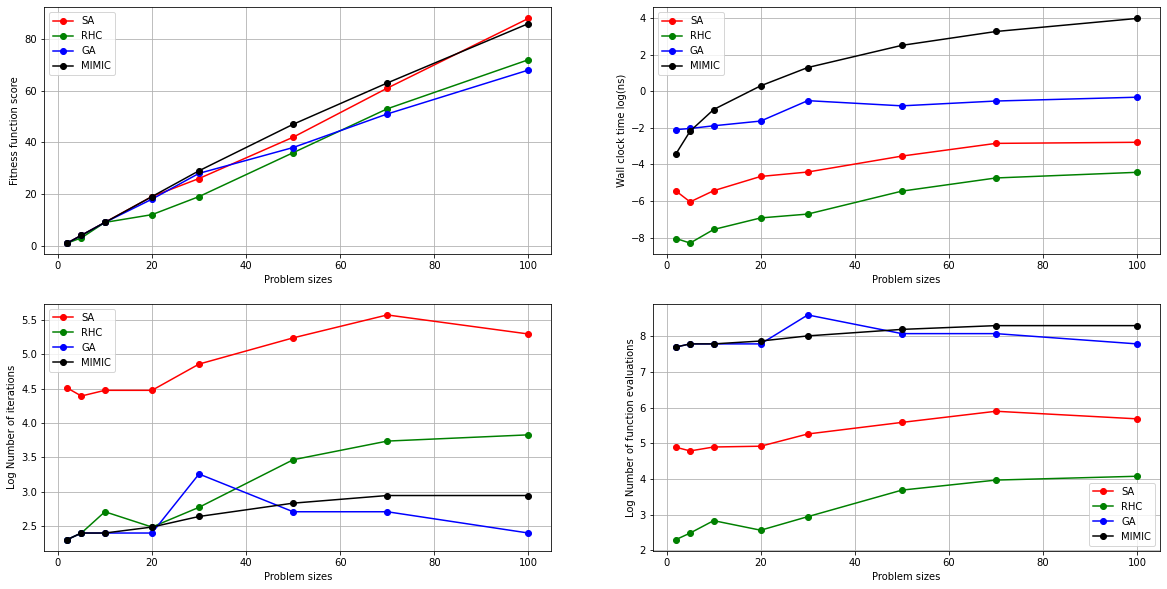

In [3]:
_, axes = plt.subplots(2, 2, figsize=(20, 10))
plot_scalability_curves("flip_flop", [2, 5, 10, 20, 30, 50, 70, 100], axes=axes).show()

## Loss curve for a particular problem size

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

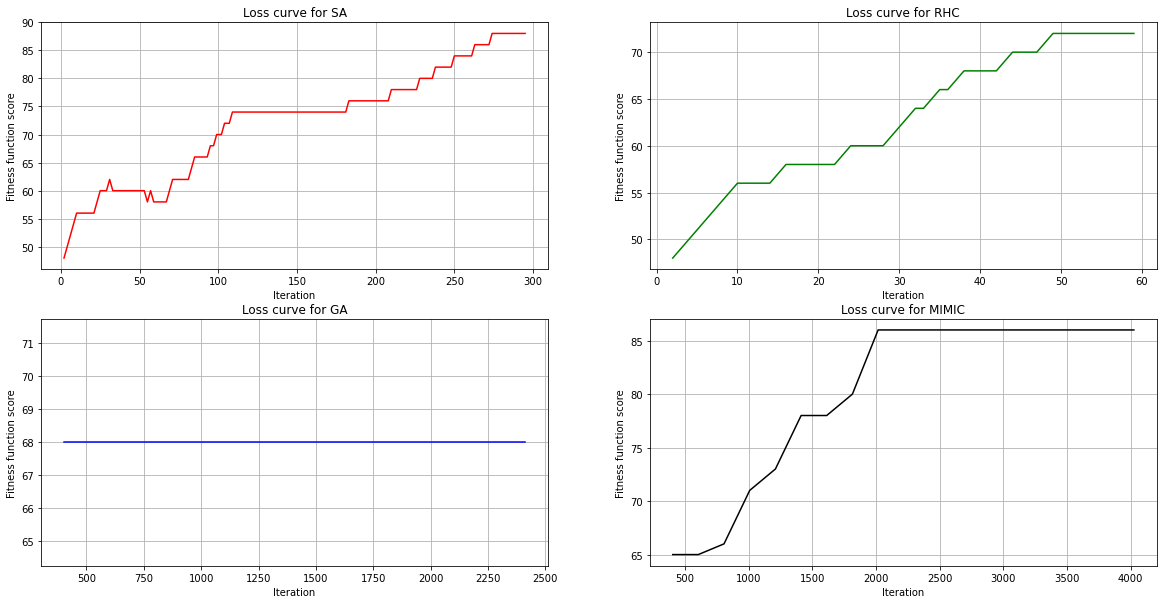

In [2]:
_, axes = plt.subplots(2, 2, figsize=(20, 10))
plot_loss_curves("flip_flop", 100, axes=axes)

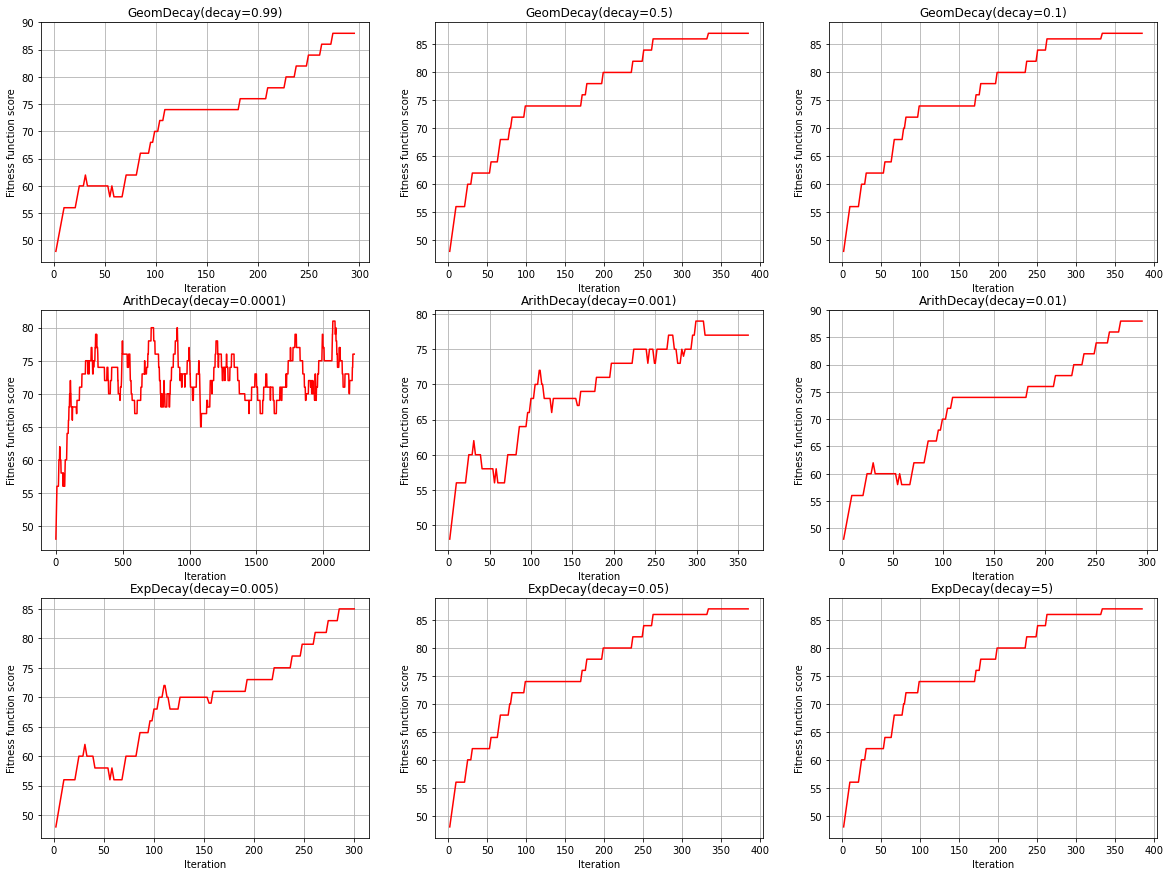

In [31]:
problem = generate_problem("flip_flop", 100)
_, axes = plt.subplots(3, 3, figsize=(20, 15))
schedules = [mlrose.GeomDecay(decay=0.99), mlrose.GeomDecay(decay=0.5), mlrose.GeomDecay(decay=0.1),
             mlrose.ArithDecay(decay=0.0001), mlrose.ArithDecay(decay=0.001), mlrose.ArithDecay(decay=0.01),
             mlrose.ExpDecay(exp_const=0.005), mlrose.ExpDecay(exp_const=0.05), mlrose.ExpDecay(exp_const=5)]
for i, schedule in enumerate(schedules):
    _, score, curve = mlrose.simulated_annealing(problem, schedule=schedule ,random_state=42, curve=True)
    axe_to_plot = axes[int(i/len(axes)), (i%len(axes[0]))]
    schedule_type = f"{type(schedule)}".split(".")[-1].replace("'>", "") 
    if type(schedule) != mlrose.ExpDecay:
        title = f"{schedule_type}(decay={schedule.decay})"
    else:
        title = f"{schedule_type}(decay={schedule.exp_const})"
    plot_fitness_curves(curve, axe_to_plot, title)

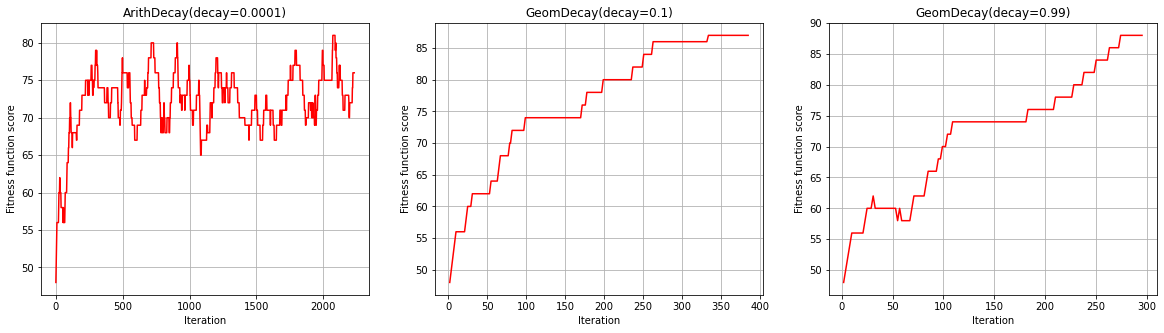

In [39]:
problem = generate_problem("flip_flop", 100)
_, axes = plt.subplots(1, 3, figsize=(20, 5))
schedules = [mlrose.ArithDecay(decay=0.0001), mlrose.GeomDecay(decay=0.1), mlrose.GeomDecay(decay=0.99)]
for i, schedule in enumerate(schedules):
    _, score, curve = mlrose.simulated_annealing(problem, schedule=schedule ,random_state=42, curve=True)
    axe_to_plot = axes[i]
    schedule_type = f"{type(schedule)}".split(".")[-1].replace("'>", "") 
    if type(schedule) != mlrose.ExpDecay:
        title = f"{schedule_type}(decay={schedule.decay})"
    else:
        title = f"{schedule_type}(decay={schedule.exp_const})"
    plot_fitness_curves(curve, axe_to_plot, title)

In [4]:
mlrose.FlipFlop().evaluate([0, 1, 0, 1])

3